In [3]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)
import statsmodels.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import(
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay,
    precision_recall_curve
)




In [8]:
who=pd.read_csv('/content/logistic_regression.csv')
data=who.copy()
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


In [9]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


In [10]:
data.shape

(32531, 14)

In [11]:
data.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32531.000000,3.253100e+04,32531.000000,32531.000000,32531.000000,32531.000000
mean,38.588362,1.897882e+05,10.081953,1078.642649,87.384341,40.441025
std,13.637644,1.055642e+05,2.571842,7388.624210,403.137260,12.347506
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178150e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783700e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370190e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
data.drop(["capital_gain","capital_loss"],axis=1,inplace=True)

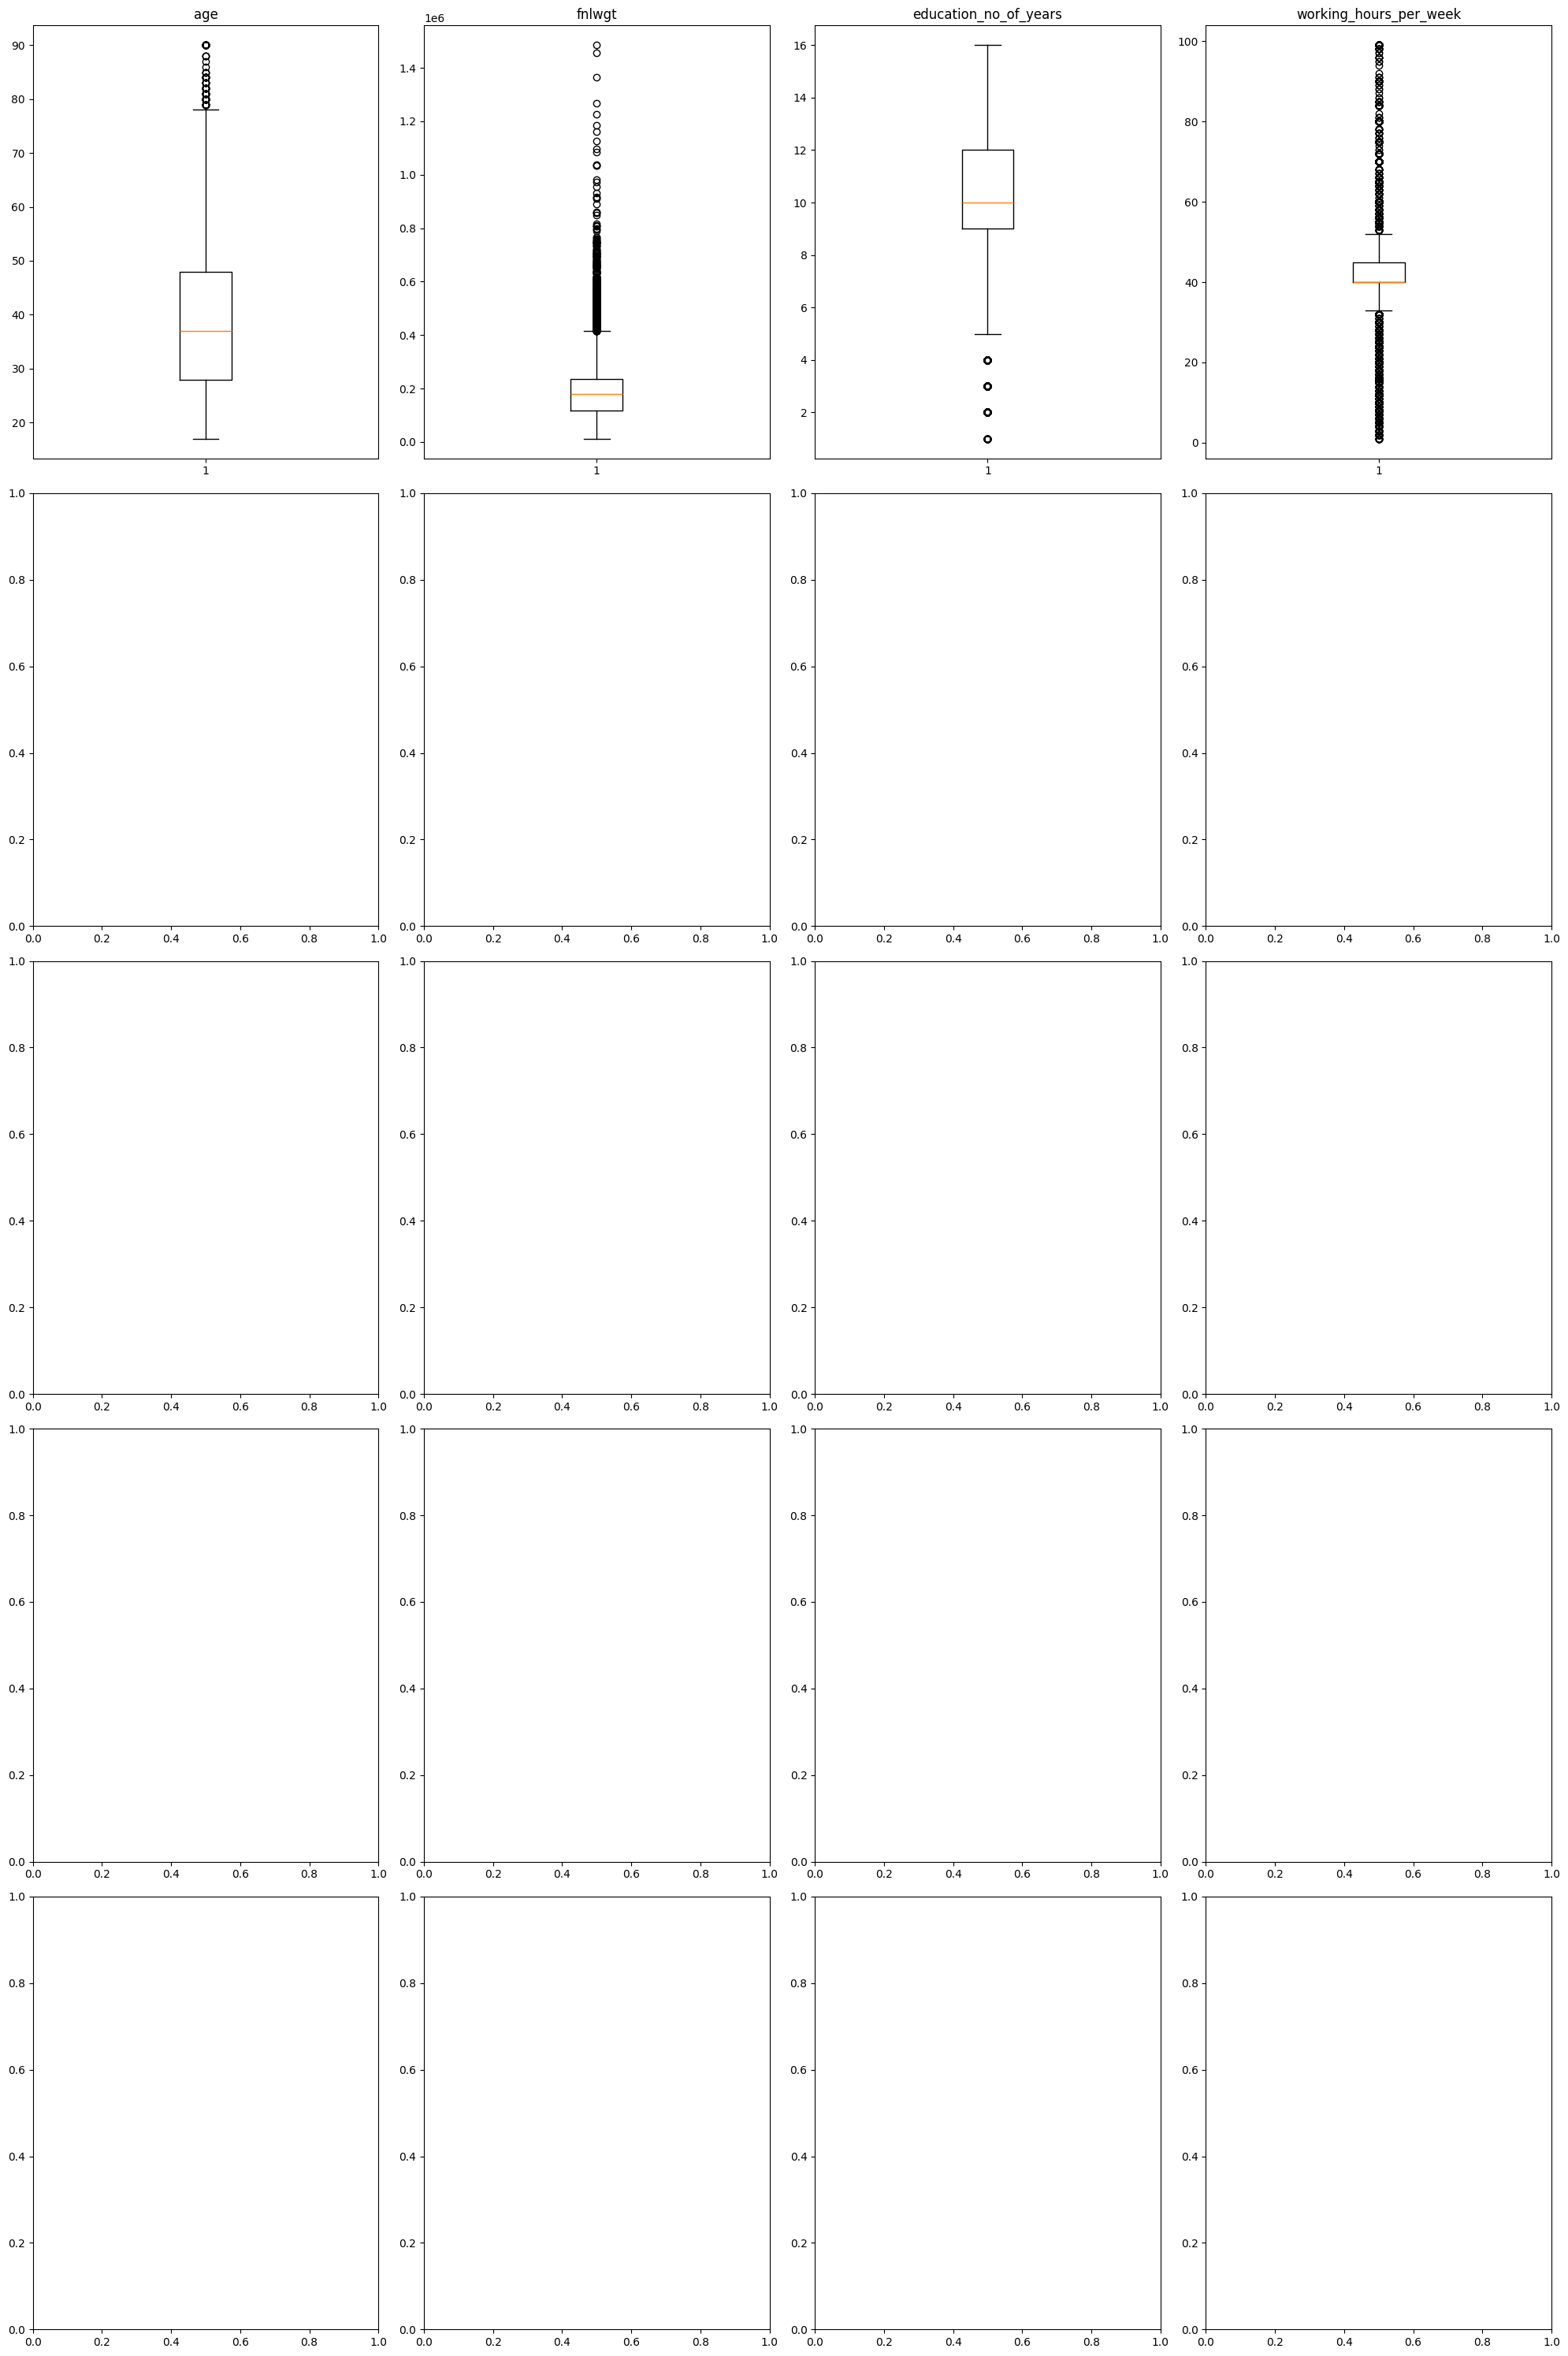

In [23]:
# numerical_col=data.select_dtypes(include=np.number).columns.tolist()
# plt.figure(figsize=(20, 30))
# for i, variable in enumerate(numerical_col):
#   plt.subplots(5, 4,i + 1)
#   plt.boxplot(data[variable], whis=1.5)
#   plt.tight_layout()
#   plt.title(variable)

# plt.show()


numerical_col = data.select_dtypes(include=np.number).columns.tolist()
fig, axes = plt.subplots(5, 4, figsize=(20, 30))

axes = axes.flatten()

for i, variable in enumerate(numerical_col):
    ax = axes[i]
    ax.boxplot(data[variable], whis=1.5)
    ax.set_title(variable)

plt.tight_layout()
plt.show()

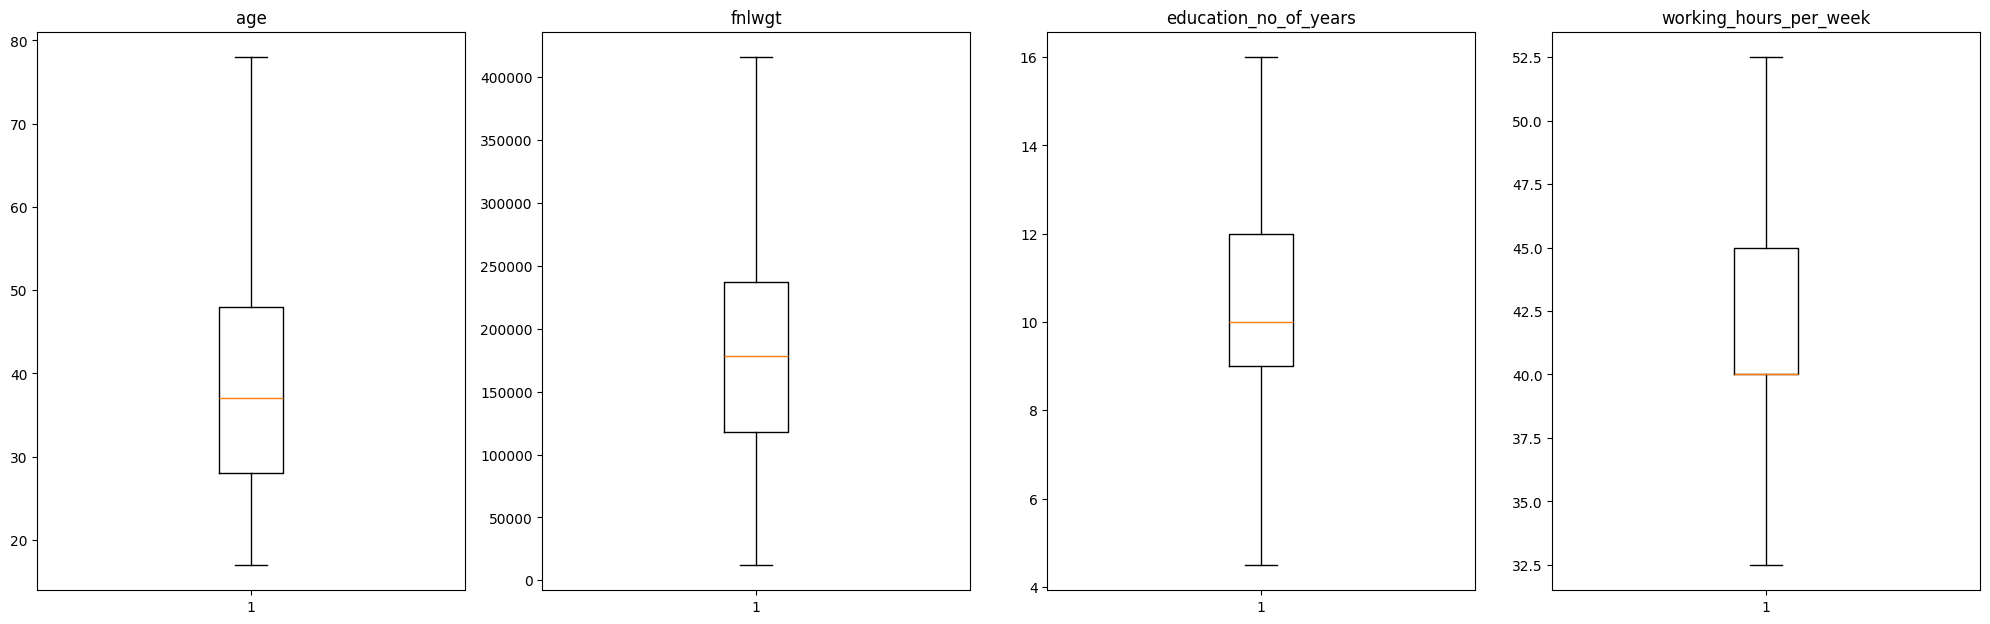

In [31]:
# def treat_outliers(df,col):
#   q1=df[col].quantile(0.25)
#   q3=df[col].quantile(0.75)
#   iqr=q3-q1
#   lower_whisker=q1-1.5*iqr
#   upper_whisker=q3+1.5*iqr

#   df[col]=np.clip(df[col],lower_whisker,upper_whisker)
#   return df


#   def treat_outliers_all(df,col_list):
#     for c in col_list:
#       df=treat_outliers(df,c)
#     return df

#   numerical_col=data.select_dtypes(include=np.number).columns.tolist()
#   data=treat_outliers_all(data,numerical_col)

#   plt.figure(figsize=(20, 30))
#   for i, variable in enumerate(numerical_col):
#     plt.subplots(5, 4,i + 1)
#     plt.boxplot(data[variable], whis=1.5)
#     plt.tight_layout()
#     plt.title(variable)

# plt.show()


def treat_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df

numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

plt.figure(figsize=(20, 30))
for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.tight_layout()
plt.show()




In [32]:
data['salary']=data['salary'].apply(lambda x:1 if x==' <=50K' else 0)

In [33]:
x=data.drop(['salary'],axis=1)
y=data['salary']

x=sm.add_constant(x)
x=pd.get_dummies(x,drop_first=True)
x=x.astype(float)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [34]:
logit=sm.Logit(y_train,x_train.astype(float))
lg=logit.fit()
print(lg.summary())

         Current function value: 0.349821
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.3678
Time:                        17:30:25   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.5200   2.75e+05   3.46e-05      1.000   -5.39e+05     5.4e+05
ag

In [35]:
def model_performance_classification_statsmodels(
    model,
    predictors,
    target,
    threshold=0.5
):
  pred_temp=model.predict(predictors)>threshold
  pred=np.round(pred_temp)

  acc=accuracy_score(target,pred)
  f1=f1_score(target,pred)
  recall=recall_score(target,pred)
  precision=precision_score(target,pred)

  df_perf=pd.DataFrame(
      {
          'Accuracy':acc,
          'f1':f1,
          'Recall':recall,
          'Precision':precision,
      },
      index=[0]
  )
  return df_perf

print("Training Performance")
model_performance_classification_statsmodels(lg,x_train,y_train)

Training Performance


,Accuracy,f1,Recall,Precision
0,0.835624,0.894957,0.923759,0.867897


In [36]:
vif_series=pd.Series(
    [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF",vif_series)

VIF const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked                   inf
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                        inf
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors                      inf
educat

In [38]:
x_train=x_train.drop("occupation_Unknown",axis=1)

vif_series2=pd.Series(
    [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],
    index=x_train.columns
)
print("VIF",vif_series2)
#

VIF const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked              1.012785
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                   3.039325
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors                      inf
educat

VIF const                              326.271888
age                                  1.531401
fnlwgt                               1.037491
working_hours_per_week               1.237162
workclass_Local-gov                  3.041470
workclass_Never-worked               1.012785
workclass_Private                    7.717533
workclass_Self-emp-inc               2.217152
workclass_Self-emp-not-inc           3.487046
workclass_State-gov                  2.317984
workclass_Unknown                    3.039325
workclass_Without-pay                1.015562
education_11th                       2.147415
education_12th                       1.422410
education_1st-4th                    1.188352
education_5th-6th                    1.338683
education_7th-8th                    1.655272
education_9th                        1.524978
education_Assoc-acdm                 2.105382
education_Assoc-voc                  2.374490
education_Bachelors                  5.939193
education_Doctorate           

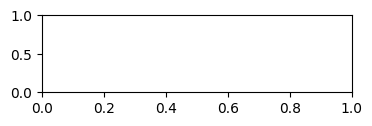

In [39]:
x_train2=x_train.drop("education_no_of_years",axis=1)

vif_series2=pd.Series(
    [variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],
    index=x_train2.columns
)
print("VIF",vif_series2)

In [41]:
logit2=sm.Logit(y_train,x_train2.astype(float))
lg2=logit2.fit(disp=False)
print("training performance")
model_performance_classification_statsmodels(lg2,x_train2,y_train)

training performance


,Accuracy,f1,Recall,Precision
0,0.835624,0.894957,0.923759,0.867897


In [42]:
cols=x_train2.columns.tolist()
max_p_value=1
while len(cols)>0:
  x_train_aux=x_train2[cols]
  model=sm.Logit(y_train,x_train_aux.astype(float))
  model_fit=model.fit(disp=False)
  p_values=model_fit.pvalues
  max_p_value=max(p_values)
  feature_with_p_max=p_values.idxmax()
  if max_p_value>0.05:
    cols.remove(feature_with_p_max)
  else:
    break
selected_features=cols
print(selected_features)

['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'education_1st-4th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_married', 'marital_status_not_married', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'race_Other', 'race_White', 'native_contienent_other', 'native_contienent_south_america']


In [43]:
x_train3=x_train2[selected_features]
logit3=sm.Logit(y_train,x_train3.astype(float))
lg3=logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22735
Method:                           MLE   Df Model:                           35
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.3666
Time:                        17:50:00   Log-Likelihood:                -7980.7
converged:                       True   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.0557      0.233     34.544      0.000       7.599       8.513
age                                -0.0314      0.002    -17.178    

In [45]:
odds=np.exp(lg3.params)
perc_change_odds=(np.exp(lg3.params)-1)*100

pd.set_option('display.max_columns',None)
pd.DataFrame({"Odds":odds, "Change_Odds":perc_change_odds},index=x_train3.columns).T


,const,age,fnlwgt,working_hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,education_1st-4th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_married,marital_status_not_married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,race_Other,race_White,native_contienent_other,native_contienent_south_america
Odds,3151.769230,0.969130,0.999999,0.937106,1.840620,1.431156,2.228214,2.180033,2.968489,4.947805,1.852163,1.809587,0.277548,0.254854,0.137414,0.054548,0.458036,0.092492,0.043336,0.341689,0.075834,0.674683,0.489944,2.887110,2.215304,1.468939,2.656708,11.291126,0.620316,0.577698,0.855304,0.532832,1.976960,0.856834,1.573320,3.524735
Change_Odds,315076.922967,-3.086978,-0.000063,-6.289395,84.062005,43.115618,122.821364,118.003275,196.848948,394.780514,85.216306,80.958691,-72.245187,-74.514571,-86.258563,-94.545220,-54.196379,-90.750752,-95.666411,-65.831123,-92.416624,-32.531684,-51.005637,188.710981,121.530367,46.893899,165.670835,1029.112563,-37.968373,-42.230185,-14.469579,-46.716755,97.696049,-14.316591,57.332018,252.473541


In [46]:
log_reg_model_train_perf=model_performance_classification_statsmodels(lg3,x_train3,y_train)
print("Training_performace")
log_reg_model_train_perf

Training_performace


,Accuracy,f1,Recall,Precision
0,0.835536,0.894936,0.924048,0.867602


In [47]:
x_test3=x_test[list(x_train3.columns)]
log_reg_model_test_perf=model_performance_classification_statsmodels(lg3,x_test3,y_test)
print("Test_performace")
log_reg_model_test_perf

Test_performace


,Accuracy,f1,Recall,Precision
0,0.830635,0.891855,0.917239,0.867838


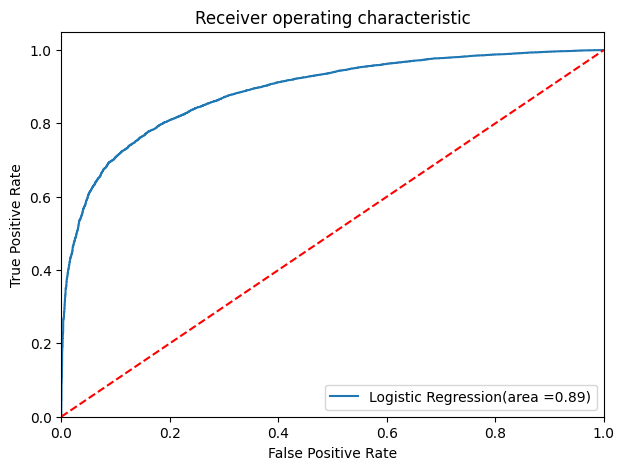

In [49]:
logit_roc_auc_train=roc_auc_score(y_train,lg3.predict(x_train3))
fpr,tpr,thresholds=roc_curve(y_train,lg3.predict(x_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label="Logistic Regression(area =%0.2f)"%logit_roc_auc_train)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [50]:
fpr,tpr,thresholds=roc_curve(y_train,lg3.predict(x_train3))

optimal_idx=np.argmax(tpr-fpr)
optimal_threshold_auc_roc=thresholds[optimal_idx]
print(optimal_threshold_auc_roc)


0.7579399407330087


In [51]:
log_reg_model_train_perf_threshold_auc_roc=model_performance_classification_statsmodels(lg3,x_train3,y_train,optimal_threshold_auc_roc)
print("Training_performace")
log_reg_model_train_perf_threshold_auc_roc


Training_performace


,Accuracy,f1,Recall,Precision
0,0.792499,0.85028,0.777301,0.938383


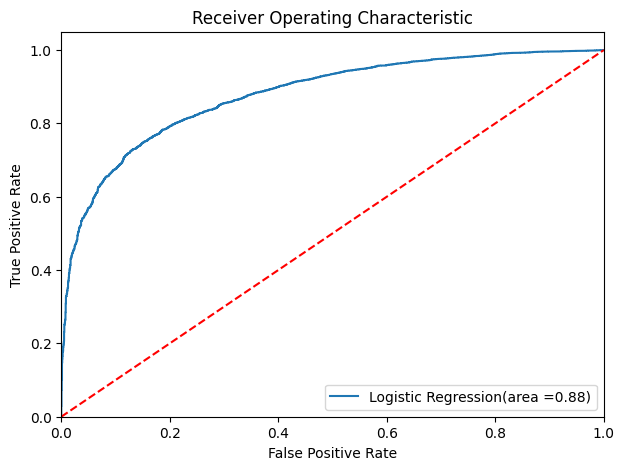

In [52]:
logit_roc_auc_train=roc_auc_score(y_test,lg3.predict(x_test3))
fpr,tpr,thresholds=roc_curve(y_test,lg3.predict(x_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr,label="Logistic Regression(area =%0.2f)"%logit_roc_auc_train)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [53]:
log_reg_model_test_perf_threshold_auc_roc=model_performance_classification_statsmodels(lg3,x_test3,y_test,optimal_threshold_auc_roc)
print("Test_performace")
log_reg_model_test_perf_threshold_auc_roc

Test_performace


,Accuracy,f1,Recall,Precision
0,0.783299,0.844336,0.771901,0.931774


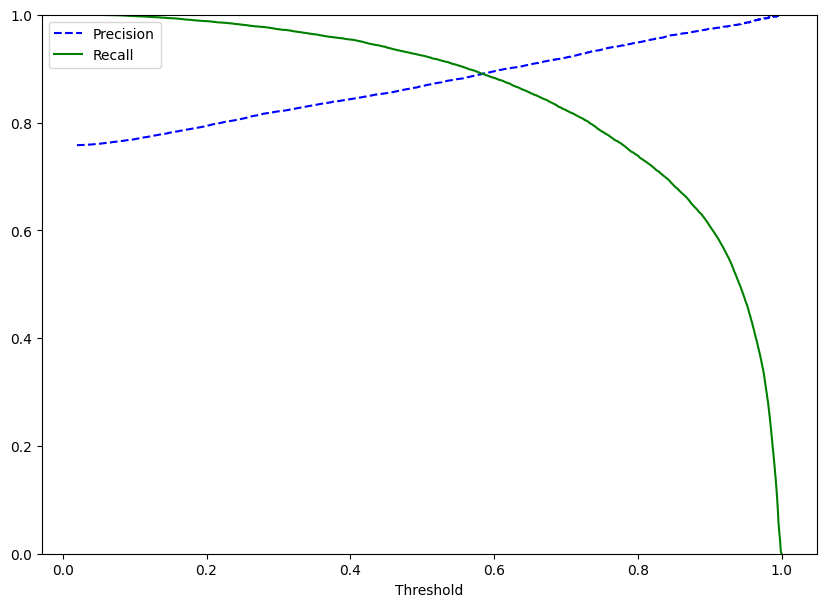

In [54]:
y_scores=lg3.predict(x_train3)
prec,rec_val,thres=precision_recall_curve(y_train,y_scores)

def plot_precision_recall_vs_threshold(prec,rec_val,thres):
  plt.plot(thres,prec[:-1],"b--",label="Precision")
  plt.plot(thres,rec_val[:-1],"g-",label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_precision_recall_vs_threshold(prec,rec_val,thres)
plt.show()

In [55]:
optimal_threshold_curve=0.58
log_reg_model_train_perf_threshold_curve=model_performance_classification_statsmodels(lg3,x_train3,y_train,optimal_threshold_curve)
print("Training_performace")
log_reg_model_train_perf_threshold_curve

Training_performace


,Accuracy,f1,Recall,Precision
0,0.833999,0.890701,0.892301,0.889107


In [57]:
log_reg_model_test_perf_threshold_curve=model_performance_classification_statsmodels(lg3,x_test3,y_test,optimal_threshold_curve)
print("Test_performace")
log_reg_model_test_perf_threshold_curve

Test_performace


,Accuracy,f1,Recall,Precision
0,0.825512,0.885343,0.884807,0.88588


In [59]:
models_train_comp_df=pd.concat(
    [
     log_reg_model_train_perf.T,
     log_reg_model_train_perf_threshold_auc_roc.T,
     log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)

models_train_comp_df.columns=[
    "Logistic_Regression(0.5)",
    "Logistic_Regression(0.76)",
    "Logistic_Regression(0.58)",
    ]
models_train_comp_df

,Logistic_Regression(0.5),Logistic_Regression(0.76),Logistic_Regression(0.58)
Accuracy,0.835536,0.792499,0.825512
f1,0.894936,0.850280,0.885343
Recall,0.924048,0.777301,0.884807
Precision,0.867602,0.938383,0.885880


In [61]:
models_test_comp_df=pd.concat(
    [
     log_reg_model_test_perf.T,
     log_reg_model_test_perf_threshold_auc_roc.T,
     log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)

models_test_comp_df.columns=[
    "Logistic_Regression(0.5)",
    "Logistic_Regression(0.76)",
    "Logistic_Regression(0.58)",
    ]

models_test_comp_df

,Logistic_Regression(0.5),Logistic_Regression(0.76),Logistic_Regression(0.58)
Accuracy,0.830635,0.783299,0.825512
f1,0.891855,0.844336,0.885343
Recall,0.917239,0.771901,0.884807
Precision,0.867838,0.931774,0.885880
